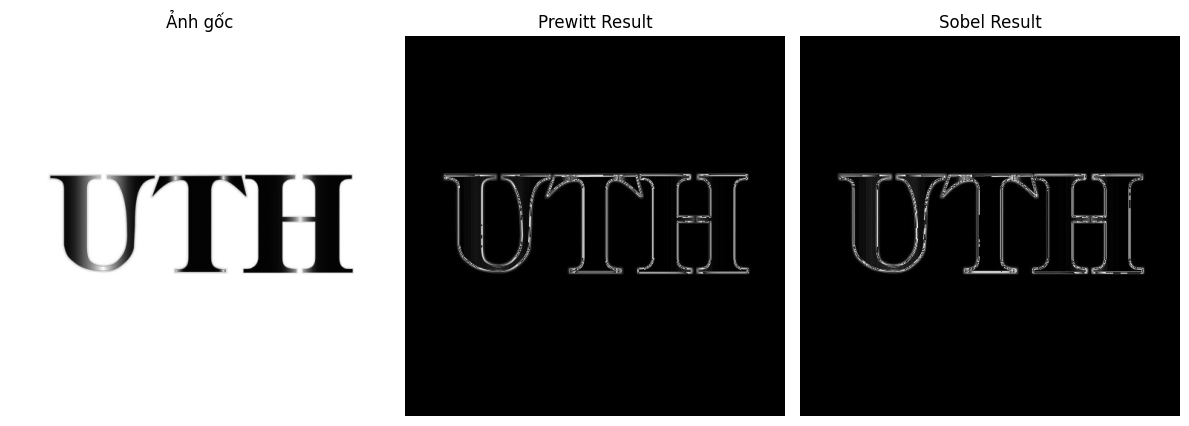

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../anh_mau.jpg', cv2.IMREAD_GRAYSCALE)

# ==========================================
# CÁCH 1: PREWITT 
# ==========================================
kernel_prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Dùng filter2D
prewitt_x = cv2.filter2D(img, cv2.CV_64F, kernel_prewitt_x)
prewitt_y = cv2.filter2D(img, cv2.CV_64F, kernel_prewitt_y)
prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y) # Hàm tính căn bậc 2 của OpenCV

# ==========================================
# CÁCH 2: SOBEL
# ==========================================
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) # 1, 0 nghĩa là đạo hàm theo x
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) # 0, 1 nghĩa là đạo hàm theo y

sobel_combined = cv2.magnitude(sobel_x, sobel_y)
# ==========================================
# HIỂN THỊ SO SÁNH
# ==========================================
plt.figure(figsize=(12, 8))

titles = ['Ảnh gốc', 'Prewitt Result', 'Sobel Result']
images = [img, prewitt_combined, sobel_combined]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(np.uint8(images[i]), cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()